# Exploring Natural Dynamics with k-Means Clustering
*Master's in Automation and Robotics - ETSII (UPM)* \
**Subject:** Artificial Intelligence\
**Course:** 2023-24\
**Student Name (ID):**
- Josep Mª Barberá (17048)
- Jorge Guijarro (23075)

**Date:** January, 14

In [577]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"
import os
import glob
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.lines import Line2D

### From .gif to folder of images properly labelled

In [ ]:
dir = os.getcwd()
if not os.path.exists(dir + "/data"):
    print("Error, data folder does not exist")
else:
    data_dir = dir + "/data"

gifs = glob.glob(data_dir + "/*.gif")
for gif in gifs:
    file_name = os.path.splitext(os.path.basename(gif))    
    print(f"Loading {file_name[0]}.gif")
    figs_dir = data_dir + "/" + file_name[0]
    if not os.path.exists(figs_dir):
        os.makedirs(figs_dir)
    cap = cv2.VideoCapture(gif)
    while True:
        ret, frame = cap.read()
        if ret == False:
            break
        rows, columns, _ = frame.shape
        
        # we crop 25 rows from the top of the frame and 35 from bottom to remove text and image labels. Colums remain equal.
        if (file_name[0][0] == "l"):
            cropped_frame = frame[100:335, 0:columns]
        else:
            cropped_frame = frame[25:rows-35, 0:columns]
        # for the name of the image we use the top right label, that is recognize with a tesseract ocr system 
        # (all credit to Tesseract Open Source OCR Engine) from this repo: https://github.com/tesseract-ocr/tesseract
        name_img = frame[0:20, 431:columns]
        I = cv2.bitwise_not(name_img)
        name_txt = pytesseract.image_to_string(I)
        name_txt = name_txt.strip()
        print(name_txt)
        try:
            int(name_txt[-1])
            # if possible means that the file name is correct
        except:
            name_txt = name_txt[:-1]
        # save frames as files (cropped and with proper name)
        filename = figs_dir + "/" + name_txt + ".png"
        cv2.imwrite(filename, cropped_frame)
    cap.release()

## Reservoirs processing

### Filtering bad images (i.e., high cloud cover)

In [ ]:
dir = os.getcwd()
if not os.path.exists(dir + "/data"):
    print("Error, data folder does not exist")
else:
    data_dir = dir + "/data"
# Detect folders within data_folder (change "lake" for your folders name)
folders = glob.glob(data_dir + "/lake*/")
folders.sort()

for folder in folders:
    file_name = os.path.splitext(os.path.basename(folder[:-1]))
    print(f"Opening {file_name[0]} folder")
    
    # Here we create a folder for the filtered images
    bad_dir = folder + "/outliers"
    if not os.path.exists(bad_dir):
        os.makedirs(bad_dir)
        
    images = glob.glob(folder + "*.png")
    for image in images:
        image_name = os.path.splitext(os.path.basename(image))
        # Loading the image and preparing for clustering
        I = cv2.imread(image)
        I1 = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
        I2 = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
        a = np.asarray(I2, dtype = np.float32)
        x, y = a.shape
        a1 = a.reshape(x*y, 1)
        # Clustering with only three clusters (normaly, the "white" content will mean clouds)
        k_means = KMeans(n_clusters = 3, init = 'k-means++', n_init = 'auto')
        model = k_means.fit(a1) 
        centroids = k_means.cluster_centers_
        labels = k_means.labels_
        a2 = centroids[labels]
        a3 = a2.reshape(x, y)
        a4 = (a3 - np.min(a3)) / (np.max(a3) - np.min(a3)) * 255
        a5 = a4.astype(np.uint8)
        colors = np.unique(a5, return_counts = True)
        print(image_name)
        plt.figure(figsize=(8,8))
        plt.imshow(a3,cmap='gray')
        plt.axis('off')
        plt.show()
        # Applying filtering
        try:
            if (colors[1][4]/(x*y) > 0.2):
                # we move the image to another folder
                os.rename(image ,bad_dir + "/" + image_name[0] + ".png")
        except:
            print(image)
print(best_areas)

### Extracting the best area for each year

Include manually the best figures to be used as reference area. For these we now that a number of clusters = 3 gives a proper output for water area.

In [611]:
bests = ['2020-07-06', '2021-07-11', '2022-07-21', '2023-08-05']

Opening lakes_20_21 folder
('2020-07-06', '.png')


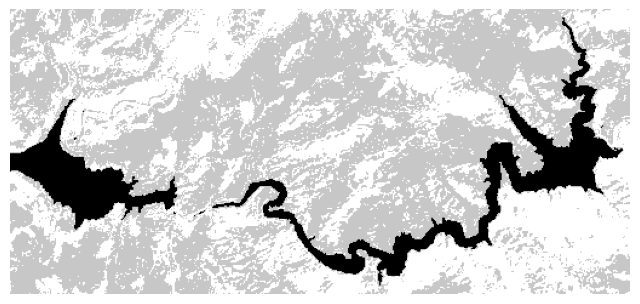

Opening lakes_21_22 folder
('2021-07-11', '.png')


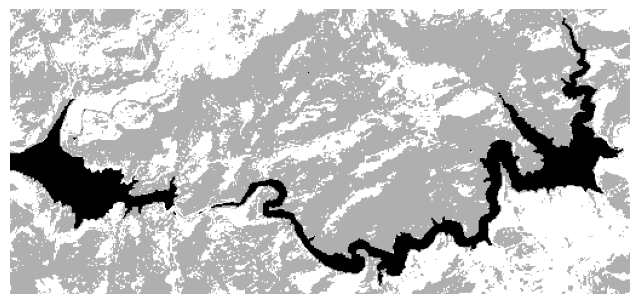

Opening lakes_22_23 folder
('2022-07-21', '.png')


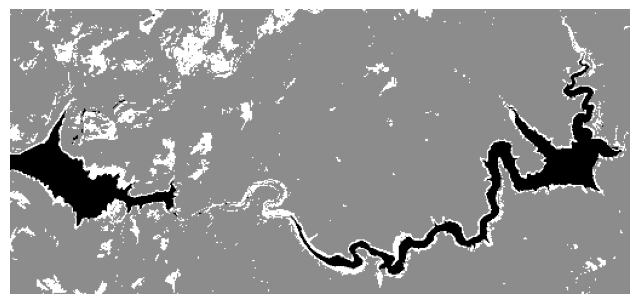

Opening lakes_23_24 folder
('2023-08-05', '.png')


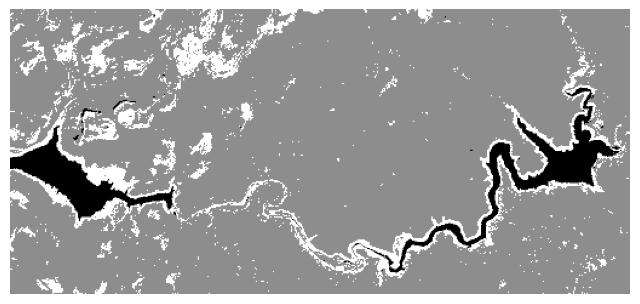

[11878, 11789, 8342, 5796]


In [624]:
dir = os.getcwd()
if not os.path.exists(dir + "/data"):
    print("Error, data folder does not exist")
else:
    data_dir = dir + "/data"
    
# Detect folders within data_folder (change "lake" for your folders name)
folders = glob.glob(data_dir + "/lake*/")
folders.sort()

best_areas = []
for folder, best in zip(folders, bests):
    file_name = os.path.splitext(os.path.basename(folder[:-1]))
    print(f"Opening {file_name[0]} folder")
    images = glob.glob(folder + "*.png")
    for image in images:
        image_name = os.path.splitext(os.path.basename(image))
        if image_name[0] == best:
            I = cv2.imread(image)
            I1 = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
            I2 = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
            a = np.asarray(I2, dtype = np.float32)
            x, y = a.shape
            a1 = a.reshape(x*y, 1)
            k_means = KMeans(n_clusters = 3, init = 'k-means++', n_init = 'auto')
            model = k_means.fit(a1) 
            centroids = k_means.cluster_centers_
            labels = k_means.labels_
            a2 = centroids[labels]
            a3 = a2.reshape(x, y)
            a4 = (a3 - np.min(a3)) / (np.max(a3) - np.min(a3)) * 255
            a5 = a4.astype(np.uint8)
            colors = np.unique(a5, return_counts = True)
            print(image_name)
            plt.figure(figsize=(8,8))
            plt.imshow(a3,cmap='gray')
            plt.axis('off')
            plt.show()
            best_areas.append(colors[1][0])
print(best_areas)

### k-Means Clustering

The following function takes a reference number and a vector containing numbers and outputs the closest one to the reference.

In [625]:
def closest_number(target, numbers):
    closest_number = None
    min_difference = float('inf')

    for n, number in numbers:
        difference = abs(target - number)

        if difference < min_difference:
            min_difference = difference
            closest_number = number

    return closest_number

Now, we rerun the process for the remaining figures, distinct from those categorized as "best." We perform k-means clustering with the number of clusters (n_cluster) ranging from 3 to 10. The output most resembling the one generated for the respective "best" category (within its year) is chosen as the correct result. In this manner, we've implemented a pseudo-dynamic clustering approach that selects the most accurate result for each image.

[11878, 11789, 8342, 5796]
Opening lakes_20_21 folder with ref area of 11878


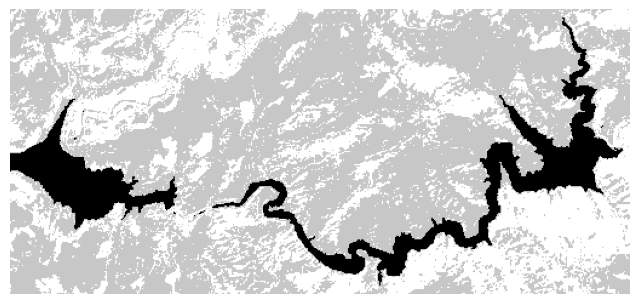

Opening lakes_21_22 folder with ref area of 11789


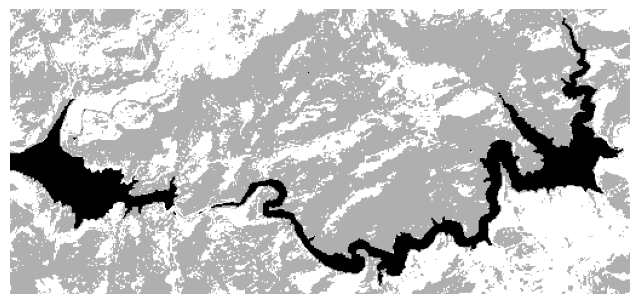

Opening lakes_22_23 folder with ref area of 8342


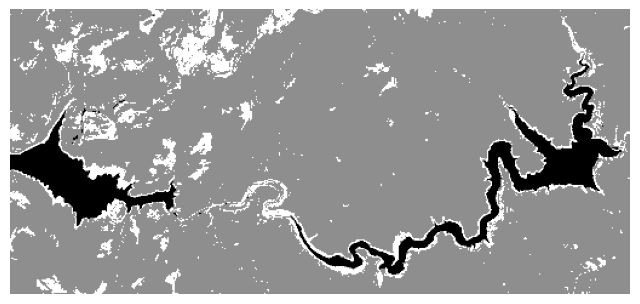

Opening lakes_23_24 folder with ref area of 5796


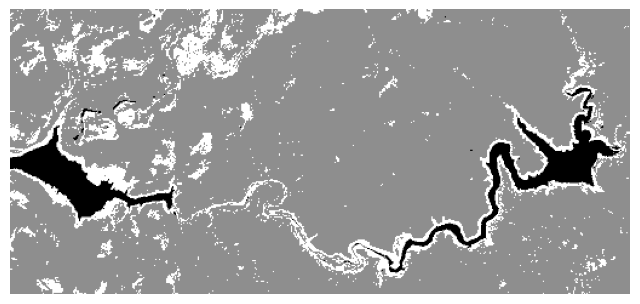

In [626]:
print(best_areas)

total_area = float(84) # we now that for researvoirs cropped images the total area corresponds physically to aproximately 80 km^2.
area = [] 
for folder, best, ref_area in zip(folders, bests, best_areas):
    file_name = os.path.splitext(os.path.basename(folder[:-1]))
    print(f"Opening {file_name[0]} folder with ref area of {ref_area}")
    bad_dir = folder + "/outliers"
    if not os.path.exists(bad_dir):
        os.makedirs(bad_dir)
    images = glob.glob(folder + "*.png")
    for image in images:
        image_name = os.path.splitext(os.path.basename(image))
        I = cv2.imread(image)
        I1 = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
        I2 = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
        a = np.asarray(I2, dtype = np.float32)
        x, y = a.shape
        a1 = a.reshape(x*y, 1)
        # Here we detect if it is a reference image or not
        if image_name[0] != best:
            my_best = []
            
            # We iterate from n=3 until n=10 computing all the clusterings and saving the total amount of black pixels
            for n in range(3,11):
                k_means = KMeans(n_clusters = n, init = 'k-means++', n_init = 'auto')
                model = k_means.fit(a1) 
                centroids = k_means.cluster_centers_
                labels = k_means.labels_
                a2 = centroids[labels]
                a3 = a2.reshape(x, y)
                a4 = (a3 - np.min(a3)) / (np.max(a3) - np.min(a3)) * 255
                a5 = a4.astype(np.uint8)
                colors = np.unique(a5, return_counts = True)
                my_best.append((n,colors[1][0]))
            # print(my_best)
            # We obtain the most similar area and look for the n_cluster that gives it
            best_area = closest_number(ref_area, my_best)
            for tup in my_best:
                if tup[1] == best_area:
                    my_n = tup[0]
                    break 
            # # We process again with the best number of cluster (just for visualization) [keep in mind that the output could be different]
            # k_means = KMeans(n_clusters = my_n, init = 'k-means++', n_init = 'auto')
            # model = k_means.fit(a1) 
            # centroids = k_means.cluster_centers_
            # labels = k_means.labels_
            # a2 = centroids[labels]
            # a3 = a2.reshape(x, y)
            # a4 = (a3 - np.min(a3)) / (np.max(a3) - np.min(a3)) * 255
            # a5 = a4.astype(np.uint8)
            # colors = np.unique(a5, return_counts = True)
            # print(image_name[0], my_n, ref_area, colors[1][0])
            # plt.figure(figsize=(8,8))
            # plt.imshow(a3,cmap='gray')
            # plt.axis('off')
            # plt.show()
            
        else:
            n = 3
            # It is a reference figure so we know that n = 3 is the best.
            k_means = KMeans(n_clusters = n, init = 'k-means++', n_init = 'auto')
            model = k_means.fit(a1) 
            centroids = k_means.cluster_centers_
            labels = k_means.labels_
            a2 = centroids[labels]
            a3 = a2.reshape(x, y)
            a4 = (a3 - np.min(a3)) / (np.max(a3) - np.min(a3)) * 255
            a5 = a4.astype(np.uint8)
            colors = np.unique(a5, return_counts = True)
            plt.figure(figsize=(8,8))
            plt.imshow(a3,cmap='gray')
            plt.axis('off')
            plt.show()
            best_area = colors[1][0]
        # print(image_name[0], my_n, ref_area, best_area)
        area.append((image_name[0], total_area*best_area/(x*y)))
area.sort()

From the resulting vector called "area" we create a dictionary based on the dates

In [ ]:
area

In [628]:
area_dict = dict(area)
# Initialize a dictionary to store condensed results
condensed_dict = {}
# Convert string dates to datetime objects
area_dict_datetime = {datetime.strptime(date, "%Y-%m-%d"): value for date, value in area_dict.items()}

This dictionary will have more than one value for the same month, because we have a dataset with weekly images. Based on that we will condense the repeated months values

In [629]:
for date, value in area_dict_datetime.items():
    month_key = (date.year, date.month)
    # Check if the month_key exists in the condensed_dict, if not, initialize it
    if month_key not in condensed_dict:
        condensed_dict[month_key] = []
    condensed_dict[month_key].append(value)

In [ ]:
len(condensed_dict)
condensed_dict

Now we compute the mean and the sample variance for these "repeated" values, having now a more consistent value for the water area

In [631]:
for month_key, values in condensed_dict.items():
    mean_value = sum(values) / len(values)
    # Check if there are more than one data point to avoid division by zero
    if len(values) > 1:
        var_value = sum((val - mean_value) ** 2 for val in values) / (len(values) - 1.0)
    else:
        var_value = 0.0  # Set variance to 0 if there's only one data point
    condensed_dict[month_key] = (mean_value, var_value)

### Plotting

Some basic latex stuff

In [632]:
# for using the next install:
  # sudo apt-get install texlive-fonts-recommended texlive-fonts-extra
  # sudo apt-get install dvipng
  # may be also this: sudo apt-get install cm-super
  # also this: sudo apt -y install texlive-science
pdf_with_latex = {                      # setup matplotlib to use latex for output
    'pgf.texsystem': 'pdflatex',        # change this if using xetex or lautex
    'text.usetex': True,                # use LaTeX to write all text
    'font.size' : 10,
    #'font.family': 'sans-serif',
    'font.family': 'serif',
    #'font.serif': ['Computer Modern Roman'],  # blank entries should cause plots
    'font.serif': [],                          # blank entries should cause plots 
    'font.sans-serif': [],                     # to inherit fonts from the document
    'font.monospace': [],
    'text.latex.preamble':r'\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage[detect-all]{siunitx}\usepackage{amsmath}\usepackage{bm}\usepackage{color}'
    #'text.latex.preamble':r'\usepackage{sansmath}\sansmath\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage[detect-all]{siunitx}\usepackage{amsmath}\usepackage{bm}'
    }
mpl.rcParams.update(pdf_with_latex)
plt.rcParams["axes.axisbelow"] = False ### draw axes, ticks and labels always above everything elese

In [633]:
# Extract dates, mean values, and variances from condensed_dict
dates = []
mean_values = []
variances = []
years = []

for month_key, (mean_value, var_value) in condensed_dict.items():
    year, month = month_key
    # Use the first day of the month for plotting
    date = datetime(year, month, 1)
    dates.append(date)
    mean_values.append(mean_value)
    variances.append(var_value)
    years.append(year)

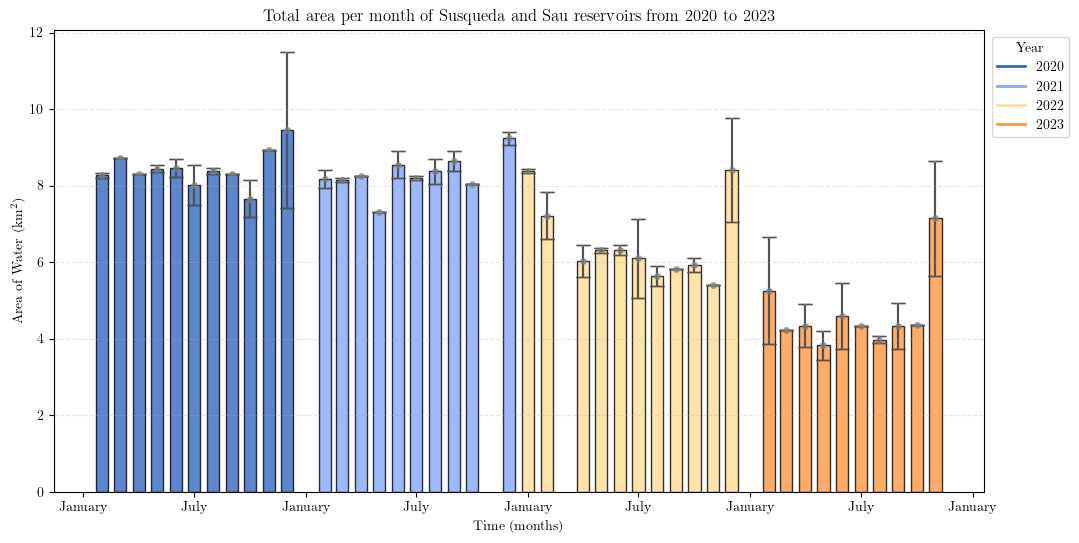

In [634]:
# Plot the condensed data with error bars
fig, ax = plt.subplots(figsize=(12, 6))

# Use a better color palette
unique_years = np.unique(years)
colors = ['#3468C0', '#86A7FC', '#FFDD95','#FF9843']

# Use bar plot with specified width and error bars representing standard deviation
bar_width = 20  # Adjust the width as needed
error_color = (0.8, 0.8, 0.8, 0.6)  # Light gray for error bars

legend_handles = []

for year, color in zip(unique_years, colors):
    indices = [i for i, y in enumerate(years) if y == year]
    ax.bar(np.array(dates)[indices], np.array(mean_values)[indices], width=bar_width, align='center',
           color=color, yerr=np.sqrt(np.array(variances)[indices]), capsize=5, alpha=0.8, edgecolor='black')
    ax.errorbar(np.array(dates)[indices], np.array(mean_values)[indices], yerr=np.sqrt(np.array(variances)[indices]),
                fmt='o', color='gray', alpha=0.65, markersize=4, capsize=5)
    
    # Create a Line2D object for the legend with the specified color
    legend_handles.append(Line2D([0], [0], color=color, lw=2, label=str(year)))

# Rotate and align the tick labels for better visibility
# fig.autofmt_xdate()

# Use a more precise date string for the x-axis locations with the full month name
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

# Set plot title
ax.set_title('Total area per month of Susqueda and Sau reservoirs from 2020 to 2023')

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Add custom legend with color information
ax.legend(handles=legend_handles, title='Year', bbox_to_anchor=(1.05, 1), loc='upper center')
ax.set_xlabel("Time (months)")
ax.set_ylabel(r"Area of Water (km$^2$)")
# Show the plot
plt.show()

fig.savefig('bar_plot_1.pdf', bbox_inches='tight', dpi=100)

In [635]:
# Extract years, total mean values, and variances from condensed_dict
years_total = []
total_mean_values = []
total_variances = []

for year in unique_years:
    indices = [i for i, y in enumerate(years) if y == year]
    total_mean_value = np.mean(np.array(mean_values)[indices])
    total_variance = np.sum(np.array(variances)[indices])  # Sum of variances
    
    years_total.append(year)
    total_mean_values.append(total_mean_value)
    total_variances.append(total_variance)

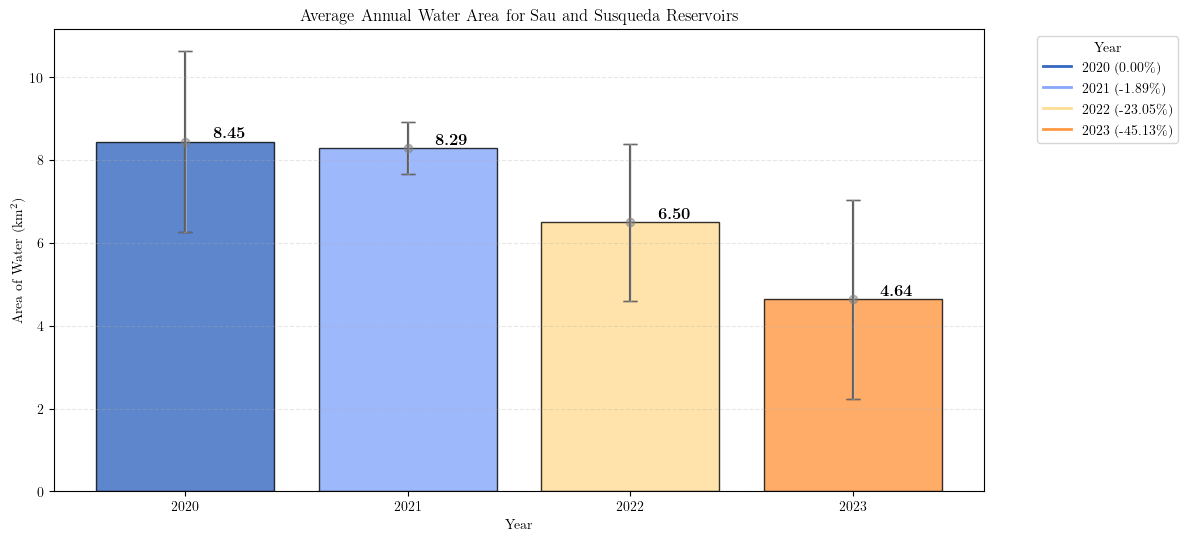

In [636]:
# Plot the total mean per year with error bars (variance) and bullets in the mean error
fig, ax = plt.subplots(figsize=(12, 6))

# Use specific colors that you can customize
custom_colors = ['#3468C0', '#86A7FC', '#FFDD95', '#FF9843']

# Use bar plot with specified width and error bars representing total variance
bar_width = 0.8  # Adjust the width as needed
error_color = (0.8, 0.8, 0.8, 0.6)  # Light gray for error bars

bars = ax.bar(years_total, total_mean_values, width=bar_width, align='center',
              color=custom_colors, yerr=np.sqrt(total_variances), capsize=5, edgecolor='black', alpha=0.8)

# Plot bullets in the mean error
for year, mean_value, variance in zip(years_total, total_mean_values, np.sqrt(total_variances)):
    ax.scatter(year, mean_value, color='gray', zorder=5, alpha=0.5)  # Gray bullet for mean error
    ax.errorbar(year, mean_value, yerr=variance, fmt='none', ecolor='lightgray', elinewidth=2, capsize=5, alpha=0.5)

# Display the number for each bar at the top
for bar, mean_value in zip(bars, total_mean_values):
    ax.text(bar.get_x() + bar.get_width() / 2 + 0.2, bar.get_height() + 0.02,
            fr'\textbf{{{mean_value:.2f}}}', ha='center', va='bottom', fontsize=12)

# Set x-axis ticks as integers (years)
ax.set_xticks(years_total)

# Set plot title
ax.set_title('Average Annual Water Area for Sau and Susqueda Reservoirs')

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Add custom legend with color information and % increase or decrease
legend_handles = []
for year, color, mean_value in zip(years_total, custom_colors, total_mean_values):
    percentage_change = ((mean_value - total_mean_values[0]) / total_mean_values[0]) * 100
    legend_label = rf"{year} ({percentage_change:.2f}\%)"
    
    # Create a Line2D object for the legend with the specified color
    legend_handles.append(Line2D([0], [0], color=color, lw=2, label=legend_label))

# Add legend
ax.legend(handles=legend_handles, title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Year")
ax.set_ylabel(r"Area of Water (km$^2$)")

# Show the plot
plt.show()

fig.savefig('bar_plot_5.pdf', bbox_inches='tight', dpi=100)

### Plotting the kmeans result for a single image
Based on https://www.unioviedo.es/compnum/labs/new/kmeans.html

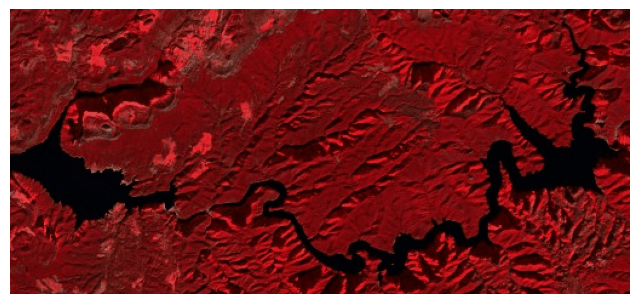

In [637]:
path = "/home/josep/Documents/ETSII/Inteligencia_Artificial/final_project/data/lakes_21_22/2021-02-01.png"

I = cv2.imread(path)
I1 = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(I1)
plt.axis('off')
plt.show()


In [638]:
I1 = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I2 = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
a = np.asarray(I2, dtype = np.float32)
x, y = a.shape
a1 = a.reshape(x*y, 1)
n = 4
k_means = KMeans(n_clusters = n, init = 'k-means++', n_init = 'auto')
model = k_means.fit(a1) 
centroids = k_means.cluster_centers_
labels = k_means.labels_
a2 = centroids[labels]
a3 = a2.reshape(x, y)
a4 = (a3 - np.min(a3)) / (np.max(a3) - np.min(a3)) * 255
a5 = a4.astype(np.uint8)
colors = np.unique(a5, return_counts = True)
print(colors[1][0], 'pixels for intensity',colors[0][0],', that is, black.')
print(colors[1][n-1], 'pixels for intensity',colors[0][n-1],', that is, white.')
print ('Area = ',  float(84)*float(colors[1][0])/float(y*x), 'km2')

23149 pixels for intensity 0 , that is, black.
11670 pixels for intensity 255 , that is, white.
Area =  16.16120345744681 km2


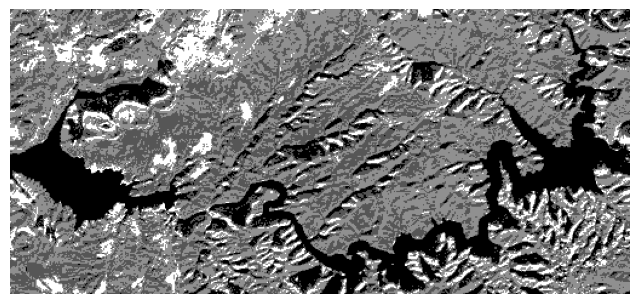

In [645]:
fig = plt.figure(figsize=(8,8))
plt.imshow(a3,cmap='gray')
plt.axis('off')
plt.show()
fig.savefig('gray.png', bbox_inches='tight', dpi=100)